# Surrogate Construction for Genz Functions
## As a function of PC order

This notebook constructs a PC surrogate for Genz functions using full and sparse quadrature and gives the root mean square error between the surrogate and the actual function.

In [1]:
# imports
import numpy as np
import math  
import matplotlib.pyplot as plt
import pandas as pd

import PyUQTk.pce as uqtkpce
import PyUQTk.PyPCE.pce_tools as pce_tools
from PyUQTk.utils.func import *

from surrogate_tools import *

PyMC is required for some of the MCMC postprocessing codes.
Will proceed without, but some convergence tests will not be available.


## Inputs

In [2]:
max_nord = 6        # Order of the PCE
pc_type = "HG"      # Polynomial type
pc_alpha = 0.0      # Free parameter > -1 for Gamma-Laguerre and Beta-Jacobi PCs
pc_beta = 1.0       # Free parameter > -1 for Gamma-Laguerre and Beta-Jacobi PCs
nSam = 100000       # Number of random samples
ndim = 2            # Number of dimensions
model= 'genz_osc'   # Choices are 'genz_osc', 'genz_exp', 'genz_cont','genz_gaus','genz_cpeak', 'genz_ppeak'  

We define the range of PC orders points we will be using.

In [3]:
num_nord=range(1,max_nord+1)
tot_ord=[i for i in num_nord]

## Full Quadrature
We loop through different PC orders for full quadrature and obtain the RMSE for each.

In [4]:
q_errors=np.zeros((4, max_nord)) #array to store quad errors

#Loop though different values for number of quad points per dimension
for i in range(max_nord):
    param = i +1 
    f_actual, pce_evals= surrogate(i, ndim, pc_type, pc_alpha, pc_beta, param, 'full', model, 'galerkin', nSam)
    f_actual2, pce_evals2=surrogate(i, ndim, pc_type, pc_alpha, pc_beta, param, 'full', model, 'regression', nSam)
    f_actual3, pce_evals3=surrogate(i, ndim, pc_type, pc_alpha, pc_beta, param, 'sparse', model, 'galerkin', nSam)
    f_actual4, pce_evals4=surrogate(i, ndim, pc_type, pc_alpha, pc_beta, param, 'sparse', model, 'regression', nSam)

    q_errors[0][i]= math.sqrt(np.square(np.subtract(f_actual,pce_evals)).mean())
    q_errors[1][i]= math.sqrt(np.square(np.subtract(f_actual2,pce_evals2)).mean())
    q_errors[2][i]= math.sqrt(np.square(np.subtract(f_actual3,pce_evals3)).mean())
    q_errors[3][i]= math.sqrt(np.square(np.subtract(f_actual4,pce_evals4)).mean())

## Summary
The following table and figures compare full and sparse quadrature RMSEs as a function of the PC order.

In [5]:
pd.DataFrame(data=np.transpose(q_errors), columns=['Full and Galerkin', 'Full and Regression', 'Sparse and Galerkin', 'Sparse and Regression'])

,Full and Galerkin,Full and Regression,Sparse and Galerkin,Sparse and Regression
0,0.510115,0.510870,0.496174,0.497290
1,0.184082,0.183482,0.177345,0.275908
2,0.096058,0.116581,0.097315,0.296309
3,0.023943,0.050058,0.024262,0.335478
4,0.010876,0.040424,0.011277,0.475006
5,0.002192,0.014056,0.001774,0.614788


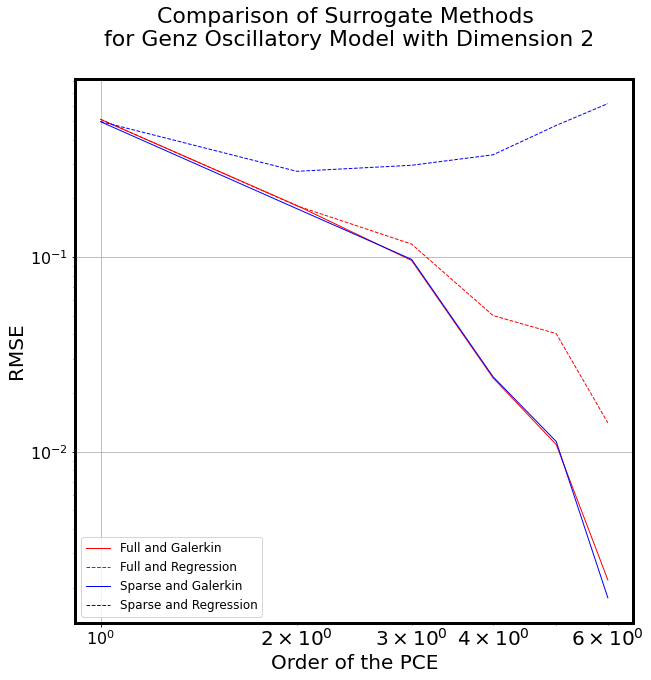

In [9]:
#Create figure
fig, ax = plt.subplots(figsize=(10,10))
#Plot Quadrature Data
plt.plot(tot_ord, q_errors[0], color='r', label='Full and Galerkin')
plt.plot(tot_ord, q_errors[1], color='r', linestyle='dashed', label='Full and Regression')
plt.plot(tot_ord, q_errors[2], color='b', label='Sparse and Galerkin')
plt.plot(tot_ord, q_errors[3], color='b', linestyle='dashed', label='Sparse and Regression')
#Label Axes
plt.xlabel("Order of the PCE",fontsize=20)
plt.ylabel("RMSE",fontsize=20)
#Create legend
plt.legend(loc='lower left')

#Model titles to be displayed
if model=="genz_osc":
    model_title="Genz Oscillatory"
elif model=="genz_gaus":
    model_title="Genz Gaussian"
elif model=="genz_ppeak":
    model_title="Genz Product-Peak"
elif model=="genz_cpeak":
    model_title="Genz Corner-Peak"
elif model=="genz_exp":
    model_title="Genz Exponential"
else:
    model_title="Genz Continuous"

#Add title
fig.suptitle("Comparison of Surrogate Methods\n for %s Model with\
 Dimension %s"%(model_title, str(ndim)), fontsize=22)
#Make scales logarithmic
plt.yscale('log')
plt.xscale('log')
#Change size of tick labels
plt.tick_params(axis='both', labelsize=16)

#Show figure
plt.show() 